#### Applied Artifical Intelligence and Machine Learning Project 

#### Customer Churn Analysis of Telco dataset predict  through various models and assess which model is better 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [111]:
df=pd.read_csv("C:/Users/aravi/OneDrive/Desktop/Semester 3/Data mining and machine Learning/Telco-Customer-Churn Project.csv")


In [90]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking whether there is null valuess in the data

#### Exploratory Analysis

In [91]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Data Visualisation

In [93]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


Converting the non numerical labels  to numeric labels  for commonality 

In [94]:
le = LabelEncoder()
df = df.apply(le.fit_transform)

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,729,925,1


Correlation Martix with heatmap to understand the correlation between churn and other columns 

<AxesSubplot:>

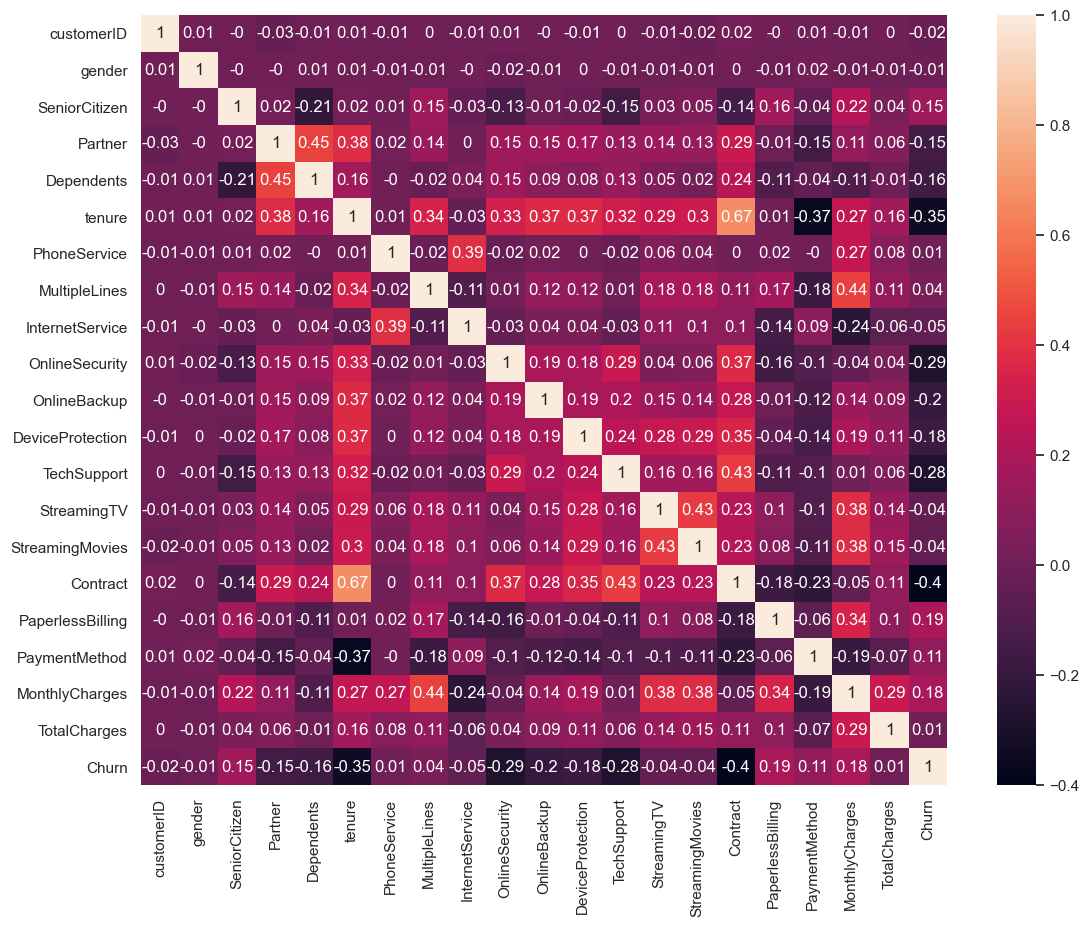

In [96]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,10)})
corr = round(df.corr(), 2) 
sns.heatmap(corr, annot=True)


#### Data Modelling 

Evaluating the correlation matrix and the heat map the columns that are irrelavant to the to the anlysis when compared to churn column with cut off at 0.1 

In [97]:
df.drop(['customerID', 'gender', 'PhoneService', 'MultipleLines', 'InternetService', 'StreamingTV', 'StreamingMovies', 'TotalCharges'], axis=1, inplace=True)


Splitting of the data to do the various training models to evaluate the best model for prediction 

In [98]:
from sklearn.model_selection import train_test_split
X = df.drop(columns = ['Churn'])
X_train, X_test, y_train, y_test = train_test_split(X, df["Churn"].values, test_size=0.3,random_state=42)

Importing necessary libraries to evaluate various models in this Porject I will be Analysing the data through Logistic Regression ,Decision Tree Classifier ,Random Forrest and Naive Bayes 

In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Model Analysis through Decision Tree Classifier 

In [100]:
clf_gini = DecisionTreeClassifier(criterion = "entropy", max_depth=3, min_samples_leaf=5)

Performing the Training and using the  Training dataset for prediction 

In [101]:
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("Predicted values:")
print(y_pred)

Predicted values:
[1 0 0 ... 0 0 0]


In [102]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
    
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)
    
print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[1403  136]
 [ 336  238]]
Accuracy :  77.66209181258874
Report :                precision    recall  f1-score   support

           0       0.81      0.91      0.86      1539
           1       0.64      0.41      0.50       574

    accuracy                           0.78      2113
   macro avg       0.72      0.66      0.68      2113
weighted avg       0.76      0.78      0.76      2113



The Precision and recall for the churn (1) through the Decision Tree Classifier Model  is 0.41 nad 0.50 which is low 

Model Analysis through Logistic Regression 

In [112]:
logistic_regression=LogisticRegression()

##Fit the model on the training data
logistic_regression.fit(X_train,y_train)

# Use the model to make predictions on the test data
y_pred = logistic_regression.predict(X_test)

C:\Users\aravi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [113]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [114]:
print("Predicted values:")
print(y_pred)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Predicted values:
[0 0 0 ... 0 1 0]
Confusion Matrix: 
 [[1383  156]
 [ 257  317]]
Accuracy :  80.45433033601515
Report :                precision    recall  f1-score   support

           0       0.84      0.90      0.87      1539
           1       0.67      0.55      0.61       574

    accuracy                           0.80      2113
   macro avg       0.76      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



The precision and recall value for churn(1) for Logistic regression is 0.55 and 0.61 which compared to Decision Tree classifier  higher,but still is in the low side

Model Analysis through Random Forest 

In [115]:
random_forest= RandomForestClassifier(n_estimators=3000, criterion="entropy" ,max_depth=10, random_state=0)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

In [117]:
print("Predicted values:")
print(y_pred)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Predicted values:
[1 0 0 ... 0 0 0]
Confusion Matrix: 
 [[1398  141]
 [ 284  290]]
Accuracy :  79.88641741599622
Report :                precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.67      0.51      0.58       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113



The precision and recall value for churn(1) for Random Forest model is 0.51 and 0.58 which in comparision with Logistical Regresssion model is less 

Model Analysis through Naive Bayes 

In [118]:

Naive_Bayes = GaussianNB()
Naive_Bayes.fit(X_train, y_train)

y_pred = Naive_Bayes.predict(X_test)

print("Predicted values:")
print(y_pred)

Predicted values:
[1 0 0 ... 0 1 0]


In [119]:
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

print("Report : ", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[1163  376]
 [ 138  436]]
Accuracy :  75.67439659252247
Report :                precision    recall  f1-score   support

           0       0.89      0.76      0.82      1539
           1       0.54      0.76      0.63       574

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.72      2113
weighted avg       0.80      0.76      0.77      2113



The precision and recall value for churn(1) for Naive Bayes is 0.76 and 0.63 which is highest in the models that has been compared by far 

When different models have been compared the the Logistic Regression requires less time in training data compared to other models such as Decision Tree Classifier ,Random Forrest and Naive Bayes 